In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import scipy
import seaborn as sns

plt.rcParams['figure.figsize'] = (12.0, 8.0)

In [6]:
data = pd.read_csv("syntactic_complexity_per_sentence.tsv", sep="\t", header=0, index_col=0)

/home/ccl/spthproi/virtualenvs/py3k/lib/python3.5/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [7]:
data_for_boxplots = data.copy()
data_for_boxplots["brow_genre"] = data_for_boxplots["brow"]
low_brow = data[data.brow == "low"].copy()
low_brow["brow_genre"] = low_brow["genre"]
data_for_boxplots = pd.concat((data_for_boxplots, low_brow))

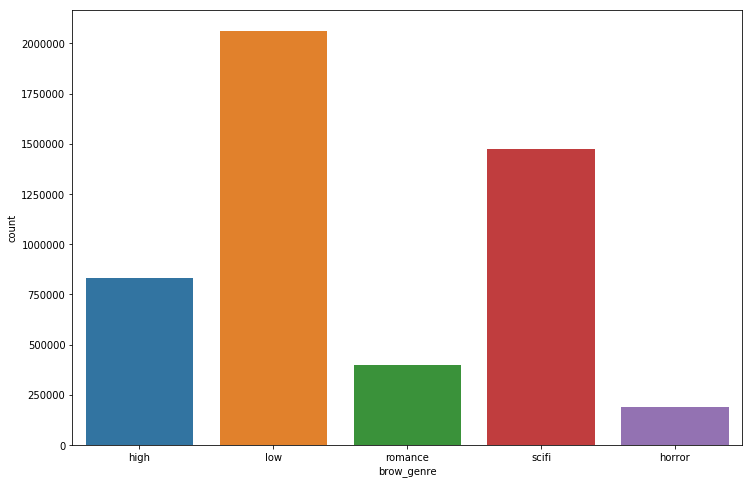

In [8]:
sns.countplot(x="brow_genre", data=data_for_boxplots)
plt.rcParams['figure.figsize'] = (12.0, 8.0)

In [20]:
data.describe()

,sentence_id,average_dependency_distance,closeness_centrality,outdegree_centralization,closeness_centralization,sentence_length,dependents_per_word,longest_shortest_path,punctuation
count,2.894423e+06,2.894423e+06,2.894423e+06,2.894423e+06,2.894423e+06,2.894423e+06,2.894423e+06,2.894423e+06,2.894423e+06
mean,2.122140e+03,2.027002e+00,4.847839e-01,3.190019e-01,4.143873e-01,1.356567e+01,8.891277e-01,4.212966e+00,2.284488e+00
std,2.389474e+03,7.367023e-01,1.795777e-01,1.905722e-01,1.756995e-01,9.443208e+00,8.073896e-02,2.147759e+00,1.588274e+00
min,0.000000e+00,0.000000e+00,3.884235e-02,1.562500e-02,3.374072e-02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.620000e+02,1.444444e+00,3.513514e-01,1.875000e-01,2.905397e-01,7.000000e+00,8.571429e-01,3.000000e+00,1.000000e+00
50%,1.525000e+03,1.916667e+00,4.583333e-01,2.695312e-01,3.804439e-01,1.100000e+01,9.090909e-01,4.000000e+00,2.000000e+00
75%,2.365000e+03,2.500000e+00,6.000000e-01,3.827160e-01,5.050000e-01,1.700000e+01,9.411765e-01,5.000000e+00,3.000000e+00
max,2.060600e+04,1.542857e+01,1.000000e+00,1.000000e+00,1.000000e+00,2.560000e+02,9.960938e-01,5.100000e+01,4.900000e+01


In [22]:
genres = "high romance scifi horror".split()

## Average dependency distance

([array([2.40056e+05, 5.05422e+05, 8.29040e+04, 3.12800e+03, 9.60000e+01,
         2.20000e+01, 1.70000e+01, 1.30000e+01, 1.00000e+00, 1.00000e+00]),
  array([9.65290e+04, 2.62917e+05, 3.96400e+04, 9.12000e+02, 1.20000e+01,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00]),
  array([4.34421e+05, 9.13727e+05, 1.25561e+05, 2.44200e+03, 2.20000e+01,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00]),
  array([6.98300e+04, 1.08931e+05, 7.73000e+03, 8.90000e+01, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00])],
 array([ 0.        ,  1.54285714,  3.08571429,  4.62857143,  6.17142857,
         7.71428571,  9.25714286, 10.8       , 12.34285714, 13.88571429,
        15.42857143]),
 <a list of 4 Lists of Patches objects>)

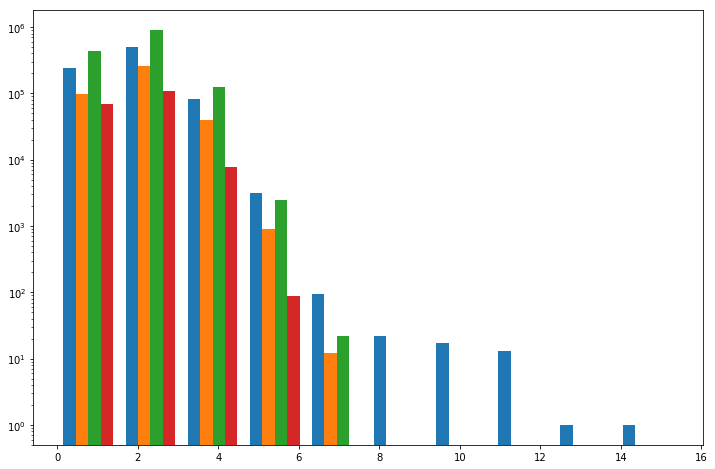

In [23]:
d = [data[data["genre"] == g]["average_dependency_distance"] for g in genres]
plt.yscale("log")
plt.hist(d)

## Closeness centrality

([array([  4758.,  57641., 142154., 173579., 144029., 117705.,  76802.,
          67519.,   8267.,  39206.]),
  array([6.9000e+01, 9.8520e+03, 5.5049e+04, 8.7987e+04, 7.4696e+04,
         6.0835e+04, 4.2035e+04, 4.0012e+04, 7.2290e+03, 2.2246e+04]),
  array([   474.,  43331., 229320., 365809., 311686., 238839., 142624.,
         110649.,   8406.,  25035.]),
  array([   68.,  3534., 19642., 36659., 37787., 36322., 25002., 20778.,
          1793.,  4995.])],
 array([0.03884235, 0.13495811, 0.23107388, 0.32718964, 0.42330541,
        0.51942117, 0.61553694, 0.7116527 , 0.80776847, 0.90388423,
        1.        ]),
 <a list of 4 Lists of Patches objects>)

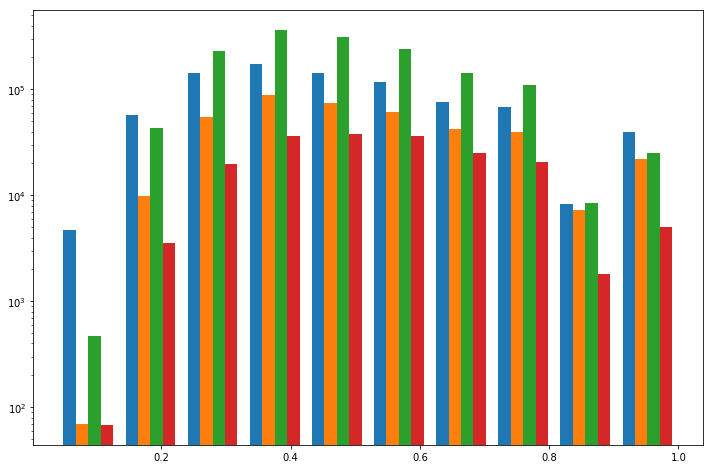

In [25]:
d = [data[data["genre"] == g]["closeness_centrality"] for g in genres]
plt.yscale("log")
plt.hist(d)

## Outdegree centralization

([array([ 71685., 231884., 215010., 112584.,  51710.,  71662.,  28571.,
           7176.,   2181.,  39197.]),
  array([  8701.,  84837., 112147.,  67094.,  33973.,  42130.,  20463.,
           6291.,   2132.,  22242.]),
  array([ 58460., 430720., 470114., 228668.,  95866., 119634.,  38525.,
           7769.,   1383.,  25034.]),
  array([ 4888., 39627., 56262., 32956., 16406., 21721.,  7778.,  1619.,
           329.,  4994.])],
 array([0.015625 , 0.1140625, 0.2125   , 0.3109375, 0.409375 , 0.5078125,
        0.60625  , 0.7046875, 0.803125 , 0.9015625, 1.       ]),
 <a list of 4 Lists of Patches objects>)

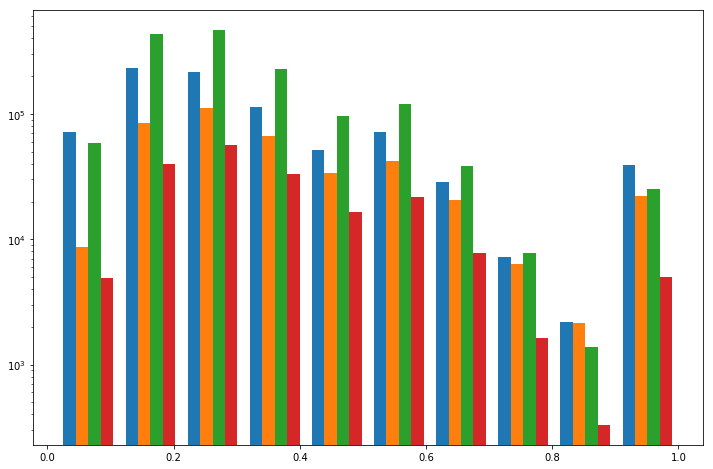

In [26]:
d = [data[data["genre"] == g]["outdegree_centralization"] for g in genres]
plt.yscale("log")
plt.hist(d)

## Closeness centralization

([array([  8037., 102613., 203620., 187633., 138387.,  68150.,  58224.,
          23661.,   2136.,  39199.]),
  array([  506., 26246., 86962., 96844., 72265., 41296., 34915., 16719.,
          2015., 22242.]),
  array([  2855., 124147., 385212., 401338., 280170., 125930.,  99930.,
          30215.,   1342.,  25034.]),
  array([  243., 10688., 37126., 45351., 41362., 22041., 18371.,  6075.,
           329.,  4994.])],
 array([0.03374072, 0.13036665, 0.22699257, 0.3236185 , 0.42024443,
        0.51687036, 0.61349629, 0.71012222, 0.80674814, 0.90337407,
        1.        ]),
 <a list of 4 Lists of Patches objects>)

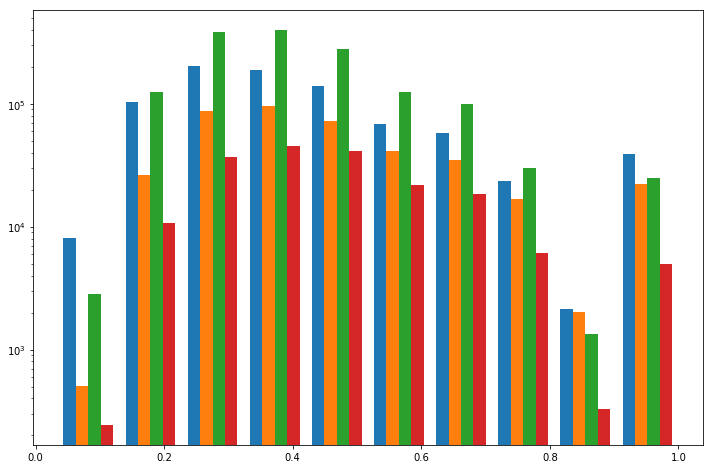

In [27]:
d = [data[data["genre"] == g]["closeness_centralization"] for g in genres]
plt.yscale("log")
plt.hist(d)

## Sentence length

([array([7.12454e+05, 1.01130e+05, 1.43580e+04, 2.78800e+03, 6.68000e+02,
         1.75000e+02, 6.40000e+01, 1.60000e+01, 5.00000e+00, 2.00000e+00]),
  array([3.79549e+05, 2.02510e+04, 2.07000e+02, 2.00000e+00, 1.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00]),
  array([1.390043e+06, 8.406000e+04, 1.995000e+03, 7.000000e+01,
         4.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00,
         0.000000e+00, 0.000000e+00]),
  array([1.79924e+05, 6.48300e+03, 1.66000e+02, 6.00000e+00, 1.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00])],
 array([  1. ,  26.5,  52. ,  77.5, 103. , 128.5, 154. , 179.5, 205. ,
        230.5, 256. ]),
 <a list of 4 Lists of Patches objects>)

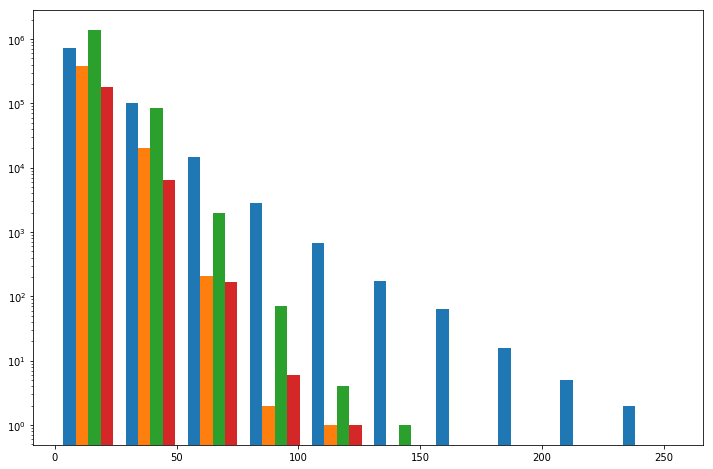

In [28]:
d = [data[data["genre"] == g]["sentence_length"] for g in genres]
plt.yscale("log")
plt.hist(d)

## Dependents per word

([array([   747.,      0.,      0.,      0.,      0.,  13990.,  27965.,
          36031., 246255., 506672.]),
  array([5.40000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         8.29900e+03, 1.41730e+04, 1.64900e+04, 1.31007e+05, 2.29987e+05]),
  array([  1135.,      0.,      0.,      0.,      0.,   3867.,  33858.,
          55373., 476793., 905147.]),
  array([4.4000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         1.1820e+03, 5.0950e+03, 9.7830e+03, 8.0246e+04, 9.0230e+04])],
 array([0.        , 0.09960938, 0.19921875, 0.29882812, 0.3984375 ,
        0.49804688, 0.59765625, 0.69726562, 0.796875  , 0.89648438,
        0.99609375]),
 <a list of 4 Lists of Patches objects>)

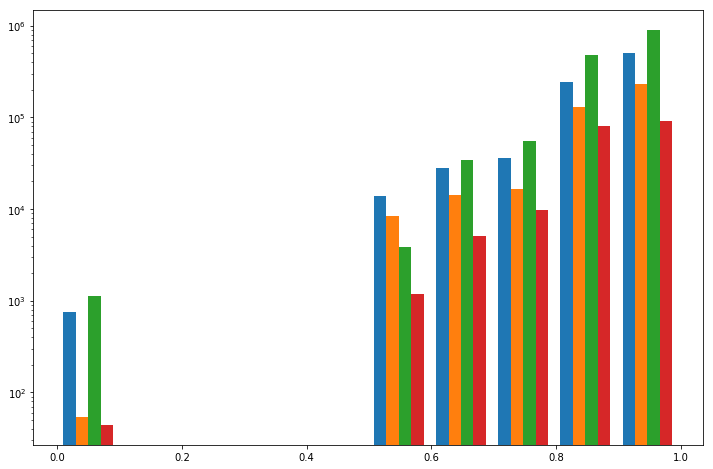

In [29]:
d = [data[data["genre"] == g]["dependents_per_word"] for g in genres]
plt.yscale("log")
plt.hist(d)

## Longest shortest path

([array([6.04567e+05, 2.01332e+05, 2.23080e+04, 2.83200e+03, 4.90000e+02,
         9.20000e+01, 3.00000e+01, 6.00000e+00, 1.00000e+00, 2.00000e+00]),
  array([3.2647e+05, 7.1667e+04, 1.8380e+03, 3.3000e+01, 2.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]),
  array([1.158521e+06, 3.077320e+05, 9.653000e+03, 2.640000e+02,
         3.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
         0.000000e+00, 0.000000e+00]),
  array([1.59569e+05, 2.62230e+04, 7.61000e+02, 2.50000e+01, 1.00000e+00,
         1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00])],
 array([ 0. ,  5.1, 10.2, 15.3, 20.4, 25.5, 30.6, 35.7, 40.8, 45.9, 51. ]),
 <a list of 4 Lists of Patches objects>)

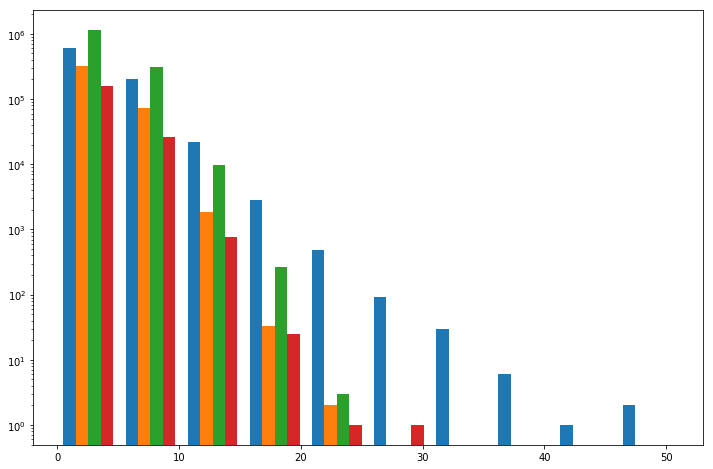

In [30]:
d = [data[data["genre"] == g]["longest_shortest_path"] for g in genres]
plt.yscale("log")
plt.hist(d)

## Punctuation

([array([7.26763e+05, 9.46940e+04, 8.47000e+03, 1.33900e+03, 2.90000e+02,
         7.70000e+01, 1.50000e+01, 8.00000e+00, 3.00000e+00, 1.00000e+00]),
  array([3.93537e+05, 6.45700e+03, 1.60000e+01, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00]),
  array([1.368106e+06, 1.064760e+05, 1.546000e+03, 4.200000e+01,
         3.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
         0.000000e+00, 0.000000e+00]),
  array([1.78204e+05, 8.30300e+03, 7.10000e+01, 2.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00])],
 array([ 0. ,  4.9,  9.8, 14.7, 19.6, 24.5, 29.4, 34.3, 39.2, 44.1, 49. ]),
 <a list of 4 Lists of Patches objects>)

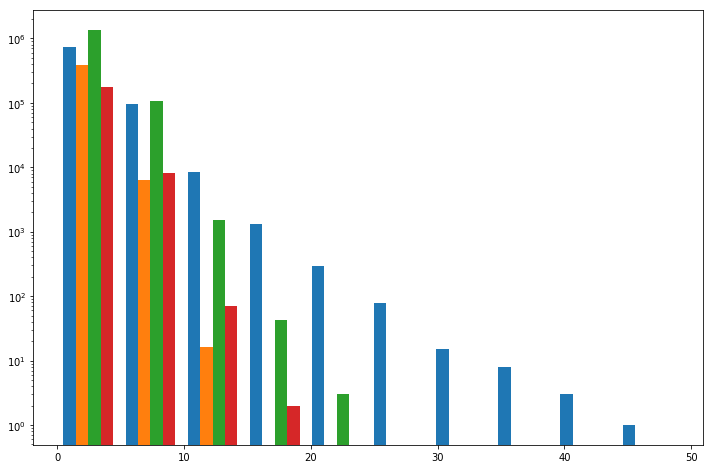

In [31]:
d = [data[data["genre"] == g]["punctuation"] for g in genres]
plt.yscale("log")
plt.hist(d)

## Dependency distances

([array([1.2024426e+07, 8.5725000e+04, 7.9980000e+03, 1.2220000e+03,
         6.3900000e+02, 4.4400000e+02, 1.8200000e+02, 1.2700000e+02,
         6.8000000e+01, 3.9000000e+01]),
  array([4.554216e+06, 1.606200e+04, 3.690000e+02, 6.000000e+00,
         2.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00,
         1.000000e+00, 1.000000e+00]),
  array([1.7711378e+07, 6.8999000e+04, 2.6560000e+03, 5.4000000e+01,
         2.2000000e+01, 6.0000000e+00, 0.0000000e+00, 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00]),
  array([1.894081e+06, 3.477000e+03, 1.380000e+02, 4.000000e+00,
         0.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00,
         0.000000e+00, 0.000000e+00])],
 array([  0. ,  16.4,  32.8,  49.2,  65.6,  82. ,  98.4, 114.8, 131.2,
        147.6, 164. ]),
 <a list of 4 Lists of Patches objects>)

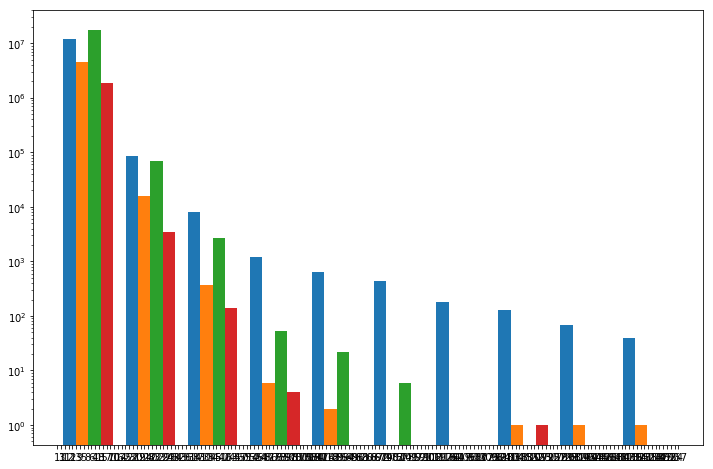

In [35]:
d = [data[data["genre"] == g]["dependency_distances"] for g in genres]
d = [[e for sent in genre for e in sent.split(",")] for genre in d]
plt.yscale("log")
plt.hist(d)

## Correlations

In [12]:
data_for_pairplot = data.copy()
data_for_pairplot["fine_labels"] = data_for_pairplot["brow"].where(data["genre"].isna(), data_for_pairplot["genre"])
data_for_pairplot.drop(columns=["ID", "Titel", "Autor", "Sprache", "Publikation", "Erste Publikation", "Geschlecht", "GND", "Verlag", "brow", "genre", "dependency_distance_stdev", "closeness_centrality_stdev", "outdegree_centralization_stdev", "closeness_centralization_stdev", "average_sentence_length_stdev", "dependents_per_word_stdev", "longest_shortest_path_stdev"], inplace=True)

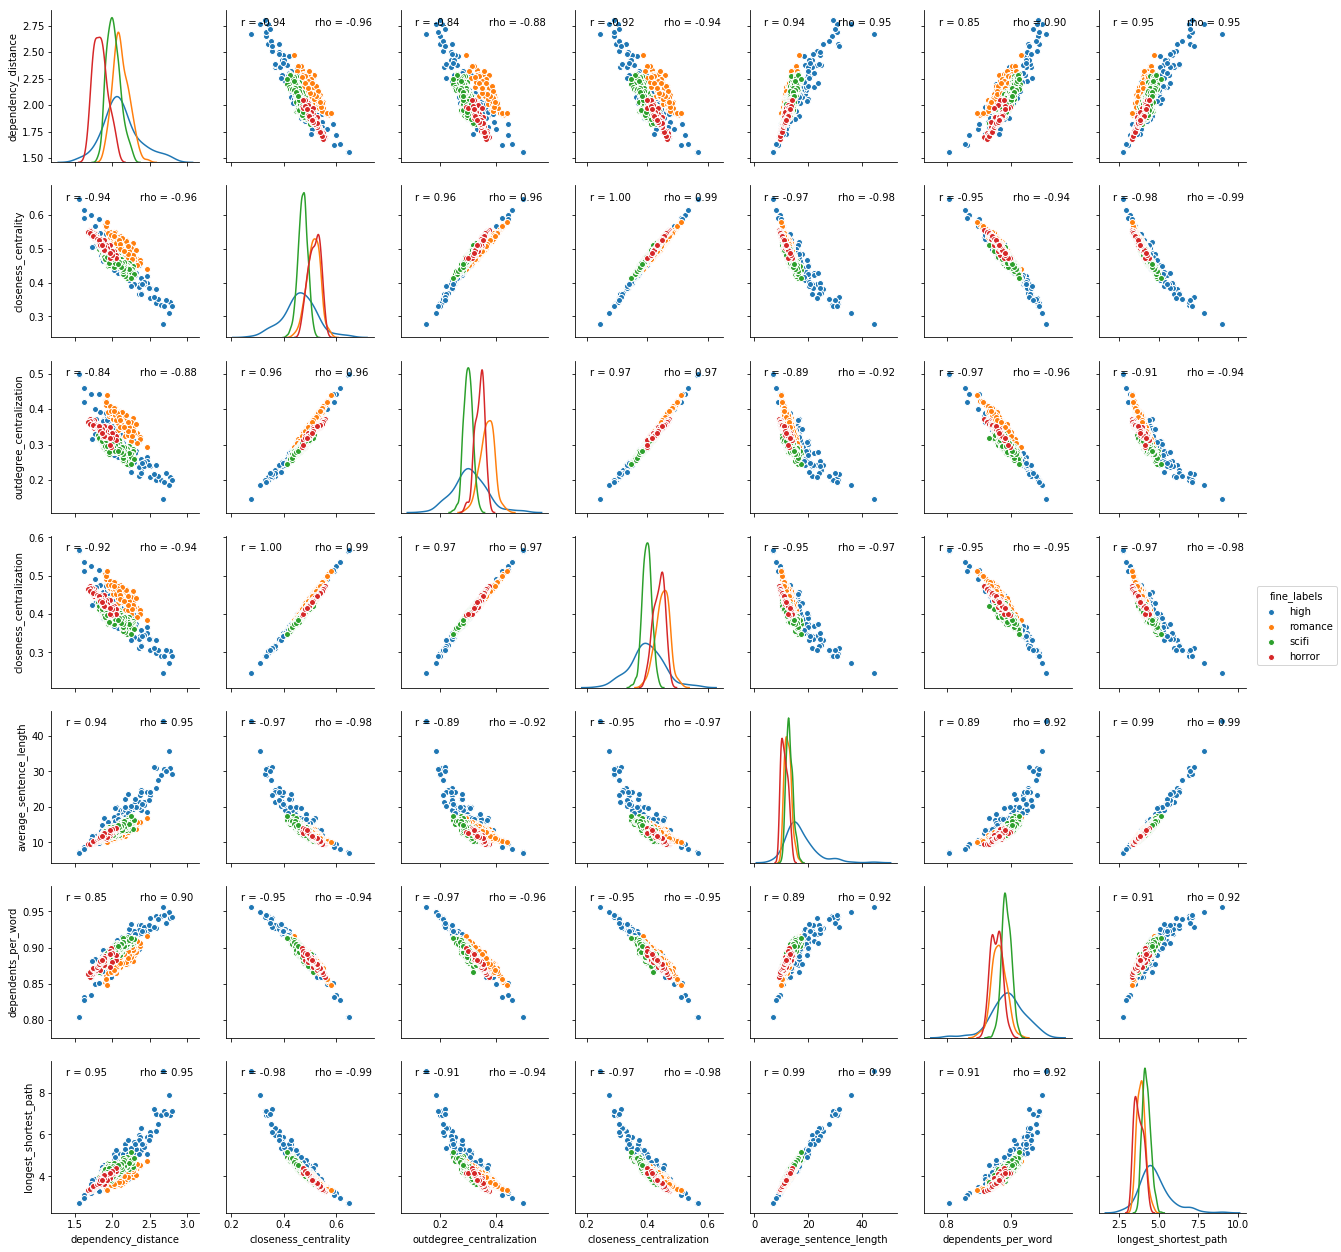

In [13]:
def corrfunc_factory(n_hues):
    n = 0
    xs, ys, current_ax = None, None, None
    def corrfunc(x, y, **kws):
        nonlocal n, xs, ys, current_ax
        n += 1
        ax = plt.gca()
        if n == 1:
            current_ax = ax
        assert ax == current_ax
        xs = pd.concat((xs, x))
        ys = pd.concat((ys, y))
        if n == 4:
            r, _ = scipy.stats.pearsonr(x, y)
            rho, _ = scipy.stats.spearmanr(x, y)
            ax.annotate("r = %.2f" % r, xy=(.1, .9), xycoords=ax.transAxes)
            ax.annotate("rho = %.2f" % rho, xy=(.6, .9), xycoords=ax.transAxes)
            xy, ys = None, None
            n = 0
    return corrfunc


corrfunc = corrfunc_factory(n_hues=4)
g = sns.pairplot(data_for_pairplot, hue="fine_labels", diag_kind="kde")
g.map_offdiag(corrfunc)